In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv("Loan_Data.csv")

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [9]:
columns=["Gender","Married","Dependents","Education","Self_Employed","Credit_History","Property_Area"]

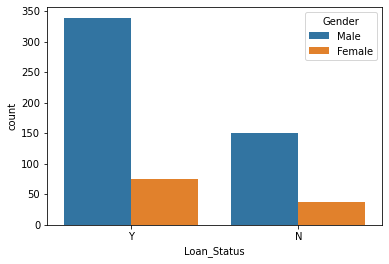

Male      489
Female    112
Name: Gender, dtype: int64 



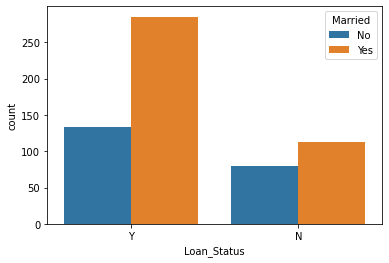

Yes    398
No     213
Name: Married, dtype: int64 



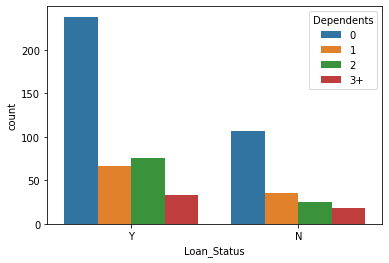

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 



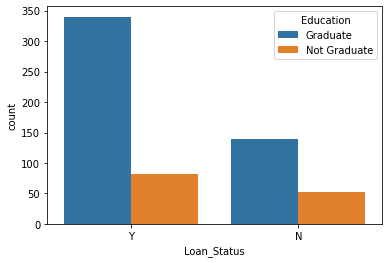

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 



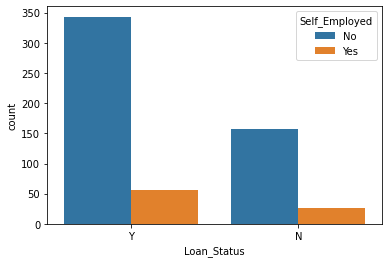

No     500
Yes     82
Name: Self_Employed, dtype: int64 



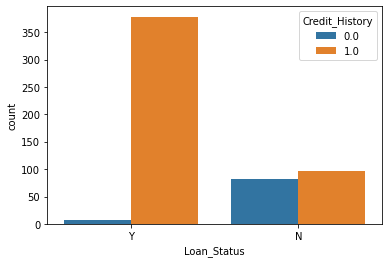

1.0    475
0.0     89
Name: Credit_History, dtype: int64 



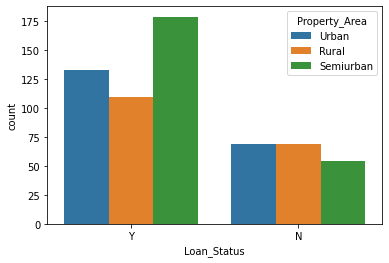

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 



In [10]:
for column in columns:
    plt.figure()
    sns.countplot(x="Loan_Status", hue=df[column],data=df)
    plt.show()
    print(df[column].value_counts(), '\n')

Being married increases your chances of getting the loan and having credit history of 0 decreases it.

In [11]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

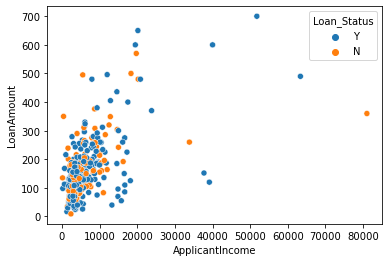

In [12]:
sns.scatterplot(x=df.ApplicantIncome, y=df.LoanAmount, hue=df.Loan_Status)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Credit_History'>

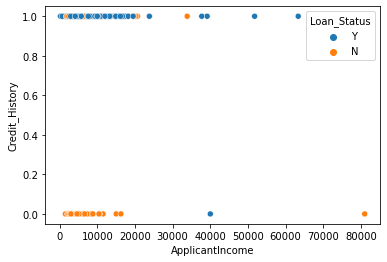

In [13]:
sns.scatterplot(x=df.ApplicantIncome, y=df.Credit_History, hue=df.Loan_Status)

<AxesSubplot:xlabel='LoanAmount', ylabel='Credit_History'>

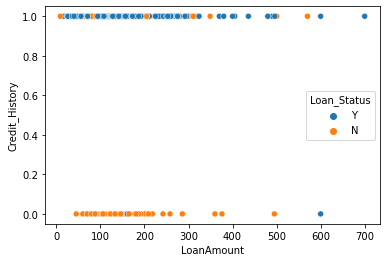

In [14]:
sns.scatterplot(x=df.LoanAmount, y=df.Credit_History, hue=df.Loan_Status)

# Cleaning

In [15]:
df.loc[df.isnull().any(axis=1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [16]:
df.drop('Loan_ID', axis=1, inplace=True) 
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [17]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
na_columns = ['Gender', "Married", 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']
for na_column in na_columns:
    df[na_column].fillna(df[na_column].mode()[0], inplace=True)

In [19]:
df.LoanAmount.fillna(df.LoanAmount.median(), inplace=True)

In [20]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [22]:
df.Gender = (df.Gender == 'Male').astype(int)
df.Married = (df.Married == 'Yes').astype(int)
df.Self_Employed = (df.Self_Employed == 'Yes').astype(int)
df.Education = (df.Education == 'Graduate').astype(int)
df.Loan_Status = (df.Loan_Status == 'Y').astype(int)
df.Dependents = df.Dependents.replace(to_replace="3+", value="3").astype(int)
df.Education.value_counts()

1    480
0    134
Name: Education, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 43.3+ KB


In [24]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1


In [41]:
dummies = pd.get_dummies(df)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int32  
 1   Married                  614 non-null    int32  
 2   Dependents               614 non-null    int32  
 3   Education                614 non-null    int32  
 4   Self_Employed            614 non-null    int32  
 5   ApplicantIncome          614 non-null    int64  
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Loan_Status              614 non-null    int32  
 11  Property_Area_Rural      614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
dtypes: float64(4), int32(6), i

In [26]:
X = dummies.drop(['Loan_Status'], axis=1)
y = dummies.Loan_Status

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [96]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [97]:
print(log.score(X_train, y_train))
print(log.score(X_test, y_test))

0.8152173913043478
0.7987012987012987


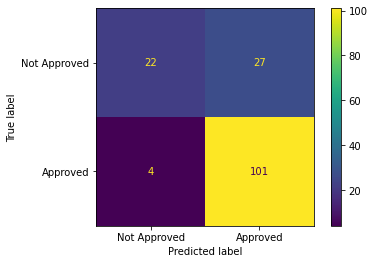

[[ 22  27]
 [  4 101]]


In [100]:
y_pred = log.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Approved", "Approved"])
disp.plot()
# sns.heatmap(confusion_matrix, cmap="binary")
plt.show()
print(cm)

In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
gender_encoder = LabelEncoder()
married_encoder = LabelEncoder()
education_encoder = LabelEncoder()
self_employed_encoder = LabelEncoder()
property_area_encoder = LabelEncoder()

# Load the encoders' mappings (you should have saved these during training)
gender_encoder.classes_ = ['Female', 'Male']
married_encoder.classes_ = ['No', 'Yes']
education_encoder.classes_ = ['Graduate', 'Not Graduate']
self_employed_encoder.classes_ = ['No', 'Yes']
property_area_encoder.classes_ = ['Rural', 'Semiurban', 'Urban']



In [1]:
gender = input("Gender (Male/Female): ")
married = input("Married (Yes/No): ")
education = input("Education (Graduate/Not Graduate): ")
self_employed = input("Self Employed (Yes/No): ")
applicant_income = float(input("Applicant Income: "))
coapplicant_income = float(input("Coapplicant Income: "))
loan_amount = float(input("Loan Amount: "))
loan_term = float(input("Loan Term (in months): "))
credit_history = float(input("Credit History (1.0 or 0.0): "))
property_area = input("Property Area (Rural/Semiurban/Urban): ")
Dependents = int(input("Enter the number of dependents"))

Gender (Male/Female): Male
Married (Yes/No): Yes
Education (Graduate/Not Graduate): Graduate
Self Employed (Yes/No): Yes
Applicant Income: 10000
Coapplicant Income: 5000
Loan Amount: 100000
Loan Term (in months): 12
Credit History (1.0 or 0.0): 1
Property Area (Rural/Semiurban/Urban): Rural
Enter the number of dependents1


In [103]:
gender = "Male"
married = "Yes"
education = "Graduate"
self_employed = "Yes"
applicant_income = float("10000")
coapplicant_income = float("5000")
loan_amount = float("100000")
loan_term = float(12)
credit_history = float(1.0)
property_area = "Rural"
Dependents = 1

In [104]:
Property_Area_Rural = 0
Property_Area_Semiurban = 0
Property_Area_Urban = 0

if property_area == "Rural":
    Property_Area_Rural = 1
elif property_area == "Semiurban":
    Property_Area_Semiurban = 1
elif property_area == "Urban":
    Property_Area_Urban = 1

if Dependents >= 3:
    Dependents = 3
    
gender_encoded = gender_encoder.transform([gender])[0]
married_encoded = married_encoder.transform([married])[0]
education_encoded = education_encoder.transform([education])[0]
self_employed_encoded = self_employed_encoder.transform([self_employed])[0]
property_area_encoded = property_area_encoder.transform([property_area])[0]
# Make a prediction using the pre-trained model
user_input = [gender_encoded, married_encoded, education_encoded, self_employed_encoded,
             applicant_income, coapplicant_income, loan_amount, loan_term, credit_history, Property_Area_Rural, Property_Area_Semiurban, Property_Area_Urban, Dependents]
column=["Gender","Married","Eduaction","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area_Rural", "Property_Area_Semiurban", "Property_Area_Urban", "Dependents"]
status=pd.DataFrame([user_input],columns=column)

In [105]:
status

,Gender,Married,Eduaction,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents
0,1,1,0,1,10000.0,5000.0,100000.0,12.0,1.0,1,0,0,1


In [106]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   1 non-null      int32  
 1   Married                  1 non-null      int32  
 2   Eduaction                1 non-null      int32  
 3   Self_Employed            1 non-null      int32  
 4   ApplicantIncome          1 non-null      float64
 5   CoapplicantIncome        1 non-null      float64
 6   LoanAmount               1 non-null      float64
 7   Loan_Amount_Term         1 non-null      float64
 8   Credit_History           1 non-null      float64
 9   Property_Area_Rural      1 non-null      int64  
 10  Property_Area_Semiurban  1 non-null      int64  
 11  Property_Area_Urban      1 non-null      int64  
 12  Dependents               1 non-null      int64  
dtypes: float64(5), int32(4), int64(4)
memory usage: 216.0 bytes


In [53]:
dummies = pd.get_dummies(status)
dummies

,Gender,Married,Eduaction,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents
0,1,1,0,1,10000.0,5000.0,100000.0,12.0,1.0,1,0,0,1


In [54]:
prediction = log.predict(dummies)

In [55]:
prediction

array([1])

In [56]:
# Interpret the prediction
result = "Approved" if prediction[0] == 1 else "Not Approved"
print(f"The loan application is {result}.")

The loan application is Approved.
